#### T.VNL Harshitha
AIE21128

#### A1. Use LSTM, Bi-LSTM networks for speech recognition. Use STFT / STCT, MFCC & LPC coefficients.

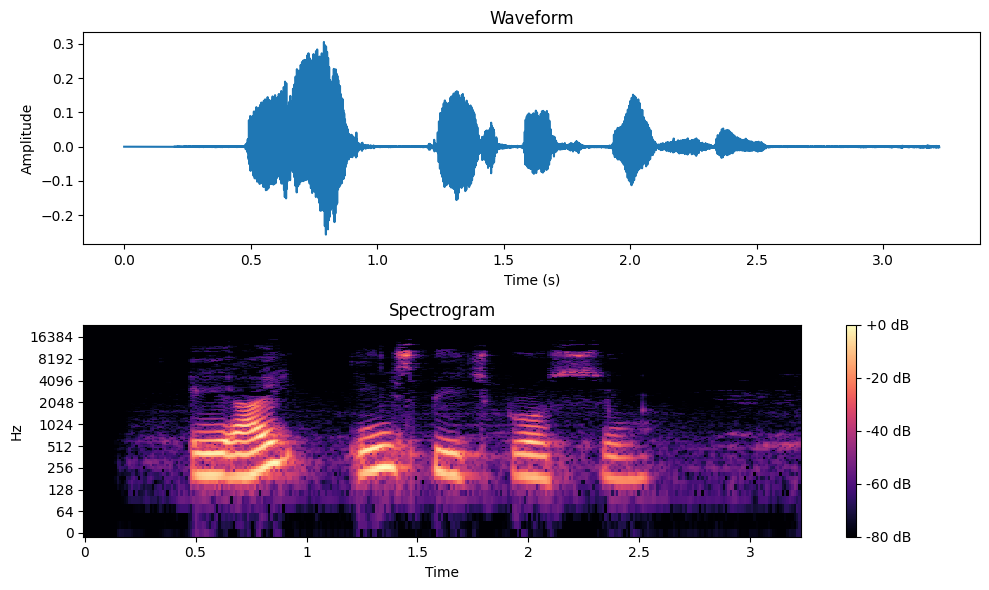

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirection  (None, 13, 256)           133120    
 al)                                                             
                                                                 
 time_distributed (TimeDist  (None, 13, 64)            16448     
 ributed)                                                        
                                                                 
 dropout (Dropout)           (None, 13, 64)            0         
                                                                 
 bidirectional_1 (Bidirecti  (None, 13, 128)           66048     
 onal)                                                           
                                                                 
 time_distributed_1 (TimeDi  (None, 13, 10)            1290      
 stributed)                                             

In [3]:
import numpy as np
import librosa
import librosa.display
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Bidirectional, Dense, TimeDistributed, Dropout
import matplotlib.pyplot as plt

def prepare_data(audio_file):
    # Load the recorded speech signal
    time_signal, sample_rate = librosa.load(audio_file, sr=None)
    
    # Short-Time Fourier Transform (STFT)
    stft_signal = np.abs(librosa.stft(time_signal))

    # Mel-Frequency Cepstral Coefficients (MFCC)
    mfcc_signal = librosa.feature.mfcc(y=time_signal, sr=sample_rate, n_mfcc=13)

    # For the LSTM model
    X = mfcc_signal.T 
    X = X.reshape(X.shape[0], X.shape[1], 1)  # Add channel dimension

    return X

def build_lstm_model(input_shape, num_classes):
    model = Sequential([
        Bidirectional(LSTM(units=128, return_sequences=True), input_shape=input_shape),
        TimeDistributed(Dense(units=64, activation='relu')),
        Dropout(0.2),
        Bidirectional(LSTM(units=64, return_sequences=True)),
        TimeDistributed(Dense(units=num_classes, activation='softmax'))
    ])

    # Compile the model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    return model

def plot_signals(audio_file):
    # Load the recorded speech signal
    time_signal, sample_rate = librosa.load(audio_file, sr=None)

    # Plot the waveform
    plt.figure(figsize=(10, 6))
    plt.subplot(2, 1, 1)
    plt.plot(np.arange(len(time_signal)) / sample_rate, time_signal)
    plt.title('Waveform')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')

    # Plot the spectrogram
    plt.subplot(2, 1, 2)
    stft_signal = np.abs(librosa.stft(time_signal))
    librosa.display.specshow(librosa.amplitude_to_db(stft_signal, ref=np.max), sr=sample_rate, x_axis='time', y_axis='log')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Spectrogram')

    plt.tight_layout()
    plt.show()


# Define the audio file path
audio_file = r"F:\Sem 6\AI in SP\Recordings\Audio.wav"

# Plot the signals
plot_signals(audio_file)

# Prepare data for LSTM model
X = prepare_data(audio_file)
num_classes = 10

# Build LSTM model
model = build_lstm_model(input_shape=X.shape[1:], num_classes=num_classes)

# Display model summary
model.summary()


#### A2. Speak the sentence “Bhanumathi weds Rajat” (भानुमति वेड्स रजि || భానుమతి వెడ్స్ రజత్). Construct speech for the word “Bharat” (భారత్ || भारत || ಭರತ್ || பாரத்) by combinin segmented phonemes taken from “Bhanumathi weds Rajat” speech recording. Listen to this wo d speech generated a nd note down the issues associated with this approach of speech synthesis. he string written Indian scripts may have some error. Please valid ate before using

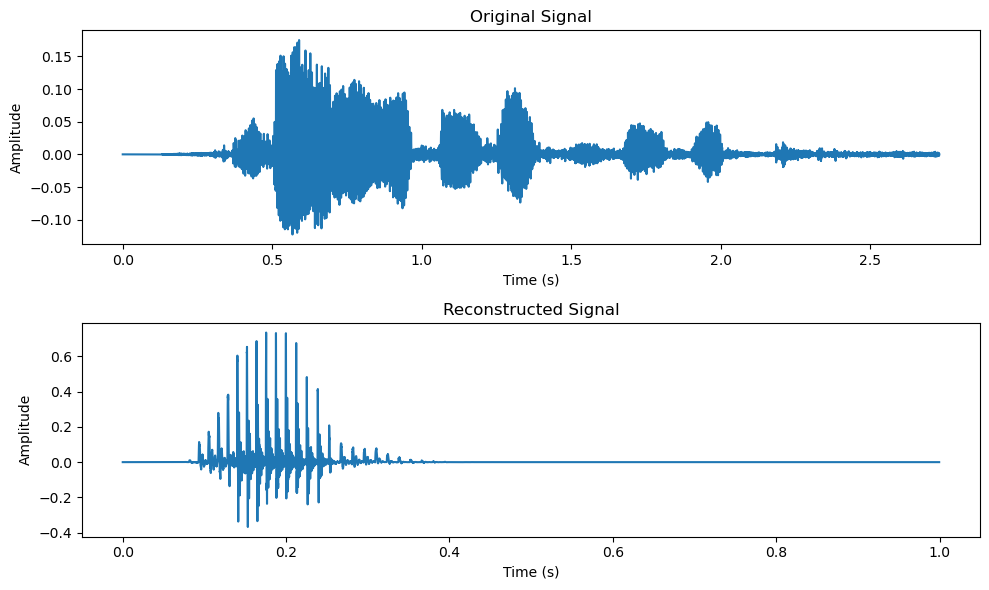

In [1]:
import os
import tempfile
import speech_recognition as sr
import pyttsx3
import matplotlib.pyplot as plt
import numpy as np
import librosa

# Directory to store file
custom_temp_dir =  r"F:\Sem 6\AI in SP"

# Function to segment phonemes for a target word in transcription
def segment_phonemes(transcription, target_word):
    words = transcription.split()
    for word in words:
        if word.lower() == target_word.lower():
            return word

# Function to synthesize speech of a word using segmented phonemes
def synthesize_word(phonemes, output_file):
    engine = pyttsx3.init()
    engine.save_to_file(phonemes, output_file)
    engine.runAndWait()

# Transcribe the audio file
audio_file = r"C:\Users\HP\Downloads\Bhanumati weds Rajat.wav"
recognizer = sr.Recognizer()
with sr.AudioFile(audio_file) as source:
    audio_data = recognizer.record(source)
transcription = recognizer.recognize_google(audio_data)

# Segment phonemes for the word "Bharat"
phonemes = segment_phonemes(transcription, "Bharat")

# Synthesize speech for the word "Bharat"
output_file = os.path.join(custom_temp_dir, "bharat_speech.wav")
synthesize_word(phonemes, output_file)

# Plot original and reconstructed signals
plt.figure(figsize=(10, 6))

# Original signal
plt.subplot(2, 1, 1)
plt.title('Original Signal')
audio_data_np, _ = librosa.load(audio_file, sr=source.SAMPLE_RATE)
plt.plot(np.linspace(0, len(audio_data_np) / source.SAMPLE_RATE, num=len(audio_data_np)), audio_data_np)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

# Reconstructed signal
reconstructed_audio_data, _ = librosa.load(output_file, sr=source.SAMPLE_RATE)
plt.subplot(2, 1, 2)
plt.title('Reconstructed Signal')
plt.plot(np.linspace(0, len(reconstructed_audio_data) / source.SAMPLE_RATE, num=len(reconstructed_audio_data)), reconstructed_audio_data)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()